K Clustering is use to see patterns in a dataset, this will give us more insight about the data. This will result to some dependent variable which we do not know before now.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


We need all the columns since we want to identify patterns, not that customer id is not a reason why they will be spending in the mall, so we have to remove that!

In [3]:
X = data.iloc[ : , 1: ].values # you can select columns or rows by putting their indicies into a list,  X = data.iloc[ : , [3, 4] ].values

I repeat there is no dependent variable

In [4]:
X

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72],
       ['Male', 67, 19, 14],
       ['Female', 35, 19, 99],
       ['Female', 58, 20, 15],
       ['Female', 24, 20, 77],
       ['Male', 37, 20, 13],
       ['Male', 22, 20, 79],
       ['Female', 35, 21, 35],
       ['Male', 20, 21, 66],
       ['Male', 52, 23, 29],
       ['Female', 35, 23, 98],
       ['Male', 35, 24, 35],
       ['Male', 25, 24, 73],
       ['Female', 46, 25, 5],
       ['Male', 31, 25, 73],
       ['Female', 54, 28, 14],
       ['Male', 29, 28, 82],
       ['Female', 45, 28, 32],
       ['Male', 35, 28, 61],
       ['Female', 40, 29, 31],
       ['Female', 23, 29, 87],
       ['Male', 60, 30, 4],
       ['Female', 21, 30, 73],
       ['Male', 53, 33, 4],
       ['Male

In [5]:
# Country column has strings as it variable we need to encode them
# It transform them into 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough') # column 0 is what we want to encode and passthrough means leave the others
X = np.array(ct.fit_transform(X)) # np.array makes it a matrix 
X


array([[0.0, 1.0, 19, 15, 39],
       [0.0, 1.0, 21, 15, 81],
       [1.0, 0.0, 20, 16, 6],
       [1.0, 0.0, 23, 16, 77],
       [1.0, 0.0, 31, 17, 40],
       [1.0, 0.0, 22, 17, 76],
       [1.0, 0.0, 35, 18, 6],
       [1.0, 0.0, 23, 18, 94],
       [0.0, 1.0, 64, 19, 3],
       [1.0, 0.0, 30, 19, 72],
       [0.0, 1.0, 67, 19, 14],
       [1.0, 0.0, 35, 19, 99],
       [1.0, 0.0, 58, 20, 15],
       [1.0, 0.0, 24, 20, 77],
       [0.0, 1.0, 37, 20, 13],
       [0.0, 1.0, 22, 20, 79],
       [1.0, 0.0, 35, 21, 35],
       [0.0, 1.0, 20, 21, 66],
       [0.0, 1.0, 52, 23, 29],
       [1.0, 0.0, 35, 23, 98],
       [0.0, 1.0, 35, 24, 35],
       [0.0, 1.0, 25, 24, 73],
       [1.0, 0.0, 46, 25, 5],
       [0.0, 1.0, 31, 25, 73],
       [1.0, 0.0, 54, 28, 14],
       [0.0, 1.0, 29, 28, 82],
       [1.0, 0.0, 45, 28, 32],
       [0.0, 1.0, 35, 28, 61],
       [1.0, 0.0, 40, 29, 31],
       [1.0, 0.0, 23, 29, 87],
       [0.0, 1.0, 60, 30, 4],
       [1.0, 0.0, 21, 30, 73],
       [0.0, 

We need to find the optimal numbers of cluster using elbow method

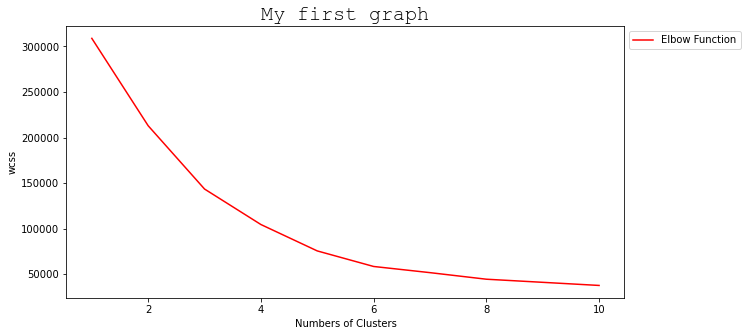

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

x = np.arange(1, 11)



plt.plot(x, wcss, label='Elbow Function', color='red')

plt.title('My first graph', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.ylabel('wcss')
plt.xlabel('Numbers of Clusters')


plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.rcParams['figure.figsize'] = 10,5

plt.show()

The optimal number of clusters will be 6, since that is where the gradient of the line start flattening out

### K Means Model

In [12]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 4,
       5, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [22]:
X

array([[0.0, 1.0, 19, 15, 39],
       [0.0, 1.0, 21, 15, 81],
       [1.0, 0.0, 20, 16, 6],
       [1.0, 0.0, 23, 16, 77],
       [1.0, 0.0, 31, 17, 40],
       [1.0, 0.0, 22, 17, 76],
       [1.0, 0.0, 35, 18, 6],
       [1.0, 0.0, 23, 18, 94],
       [0.0, 1.0, 64, 19, 3],
       [1.0, 0.0, 30, 19, 72],
       [0.0, 1.0, 67, 19, 14],
       [1.0, 0.0, 35, 19, 99],
       [1.0, 0.0, 58, 20, 15],
       [1.0, 0.0, 24, 20, 77],
       [0.0, 1.0, 37, 20, 13],
       [0.0, 1.0, 22, 20, 79],
       [1.0, 0.0, 35, 21, 35],
       [0.0, 1.0, 20, 21, 66],
       [0.0, 1.0, 52, 23, 29],
       [1.0, 0.0, 35, 23, 98],
       [0.0, 1.0, 35, 24, 35],
       [0.0, 1.0, 25, 24, 73],
       [1.0, 0.0, 46, 25, 5],
       [0.0, 1.0, 31, 25, 73],
       [1.0, 0.0, 54, 28, 14],
       [0.0, 1.0, 29, 28, 82],
       [1.0, 0.0, 45, 28, 32],
       [0.0, 1.0, 35, 28, 61],
       [1.0, 0.0, 40, 29, 31],
       [1.0, 0.0, 23, 29, 87],
       [0.0, 1.0, 60, 30, 4],
       [1.0, 0.0, 21, 30, 73],
       [0.0, 

The first customer belongs to cluster six, last customer belongs to cluster 0.

### Visualisation of the variable

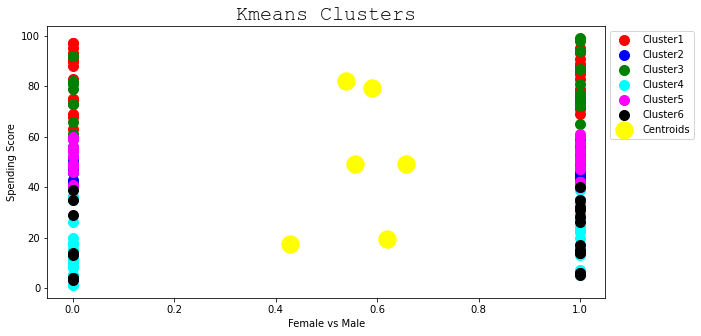

In [26]:
from cProfile import label
from turtle import color


color_list = [
    'red', 'blue', 'green', 'cyan', 'magenta', 'black'
]

for i in range(0, 6):
    plt.scatter(X[y_kmeans==i, 0],X[y_kmeans==i, 4], s = 100, color = color_list[i], label=f'Cluster{i+1}')  # row where y_kmeans == i

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,4], s=300, color='yellow', label='Centroids')

plt.title('Kmeans Clusters', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Female vs Male')
plt.ylabel('Spending Score')



plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.rcParams['figure.figsize'] = 10,5

plt.show()

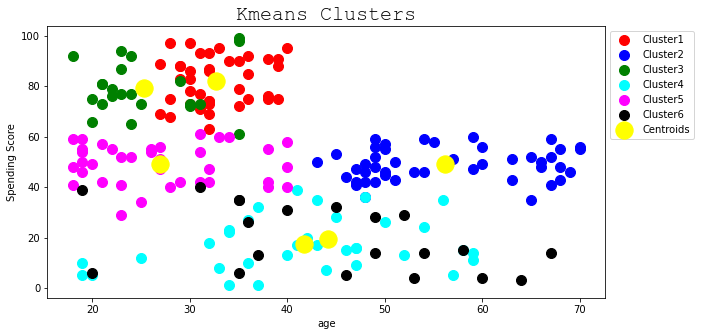

In [25]:
from cProfile import label
from turtle import color


color_list = [
    'red', 'blue', 'green', 'cyan', 'magenta', 'black'
]

for i in range(0, 6):
    plt.scatter(X[y_kmeans==i, 2],X[y_kmeans==i, 4], s = 100, color = color_list[i], label=f'Cluster{i+1}')  # row where y_kmeans == i

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,4], s=300, color='yellow', label='Centroids') # cluster column must correspond

plt.title('Kmeans Clusters', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('age')
plt.ylabel('Spending Score')



plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.rcParams['figure.figsize'] = 10,5

plt.show()

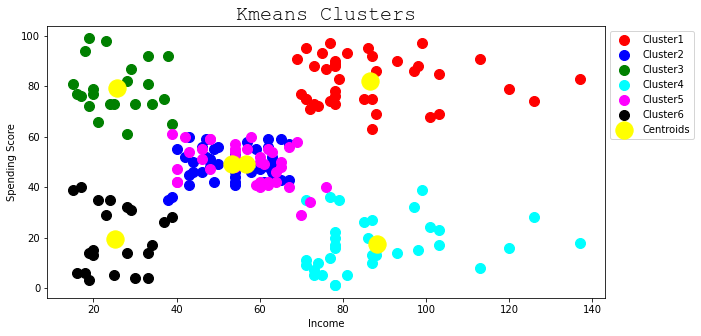

In [27]:
from cProfile import label
from turtle import color


color_list = [
    'red', 'blue', 'green', 'cyan', 'magenta', 'black'
]

for i in range(0, 6):
    plt.scatter(X[y_kmeans==i, 3],X[y_kmeans==i, 4], s = 100, color = color_list[i], label=f'Cluster{i+1}')  # row where y_kmeans == i

plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:,4], s=300, color='yellow', label='Centroids') # cluster column must correspond

plt.title('Kmeans Clusters', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Income')
plt.ylabel('Spending Score')



plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.rcParams['figure.figsize'] = 10,5

plt.show()